# Simulation Showcase

Welcome! This notebook serves as a demonstration for utilizing methods as described in the paper:
**"Quantum Simulation of Highly-Oscillatory Many-Body Hamiltonians for Near-Term Devices"**.

## Overview
This notebook is designed to showcase key functions and methods within this repository, with options for:

1. **Configuring Parameters**: Input parameters for customized pulse settings and simulation environments.
2. **Comparing Methods**: Visualize and compare the performance of various quantum simulation methods.

## Getting Started
For proper functionality, ensure this notebook is in the same directory as the required `.py` files, so that functions and modules load correctly.

---

In [34]:
import numpy as np
from numpy import sqrt
from full_time_evolution_operator import *
from parameter_generator import *
from error_vs_number_of_timestep import *
import matplotlib.pyplot as plt

## Input Configuration: Customize Pulse and Simulation Settings

In this section, you can set input parameters to define pulse configurations and simulation settings. These parameters control the simulation’s initial conditions, runtime, and pulse characteristics.

In [35]:
n = 3
starttime = 0
terminatetime = 0.01
Omega = np.array([4,3,3.2]) * 1e3 * pi/2
C = np.array([[0,7,12],[7,0,20],[12,20,0]]) * pi/2

Q0 = 5
taup = 10 * 1e-3
DeltaF = 30 * 1e3
phi0 = 0
deltat = 5 * 1e-3
deltaf = 0
eta = 40

Amax = np.sqrt((2 * pi * DeltaF * Q0)/taup)

def phi(t):
    return phi0 + (pi * DeltaF * t *(t/taup - 1))

def A(t):
    return Amax * exp(-4 * (2*t/taup - 1)** eta)

def ex(t):
    return 1/2 * A(t) * cos(phi(t))

def ey(t):
    return 1/2 * A(t) * sin(phi(t))

## Pulse Plot

The following code generates a plot for the pulse function based on the specified configurations, helping to understand the pulse characteristics over time.

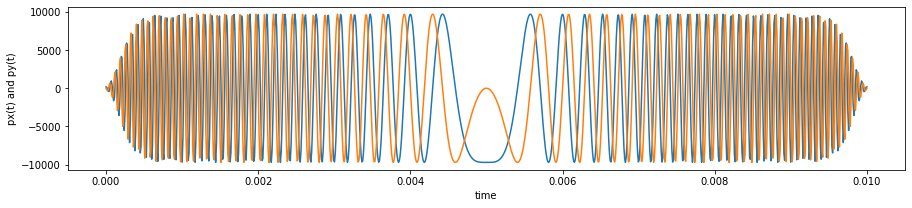

In [36]:
timegrid = np.linspace(0,0.01,1000)
pxvector = 2 * ex(timegrid)
pyvector = 2 * ey(timegrid)
plt.figure(figsize=(15, 3))
plt.xlabel('time')
plt.ylabel('px(t) and py(t)')
plt.plot(timegrid,pxvector)
plt.plot(timegrid,pyvector)

### Calculate Reference Solution

In this section, we calculate a reference solution. Below is an example calculation self-referencing the Magnus method proposed in the paper.

In [37]:
numberoftimestep = 10000
parameterstorer = parametergenerator(n, starttime, terminatetime, numberoftimestep, Omega, ex, ey, integration_method='magnus4_GL3')
exactU = full_time_evolution_operator(n,'4th Order Yoshida',starttime,terminatetime,numberoftimestep,parameterstorer,C)

/Users/guannan/Desktop/MaQnus/parameter_generator.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  parameterstorer[i, 0, :] = paraX
/Users/guannan/Desktop/MaQnus/parameter_generator.py:207: ComplexWarning: Casting complex values to real discards the imaginary part
  parameterstorer[i, 1, :] = paraY
/Users/guannan/Desktop/MaQnus/parameter_generator.py:208: ComplexWarning: Casting complex values to real discards the imaginary part
  parameterstorer[i, 2, :] = paraZ


### Method Comparison: Description and Usage

This section compares different methods and may take **approximately 2 minute** to complete. 

#### Method Descriptions:

- **method = 'trotter1_startingpoint'**: First-order Trotter method for splitting with starting point method for integration.
- **method = 'strang2_midpoint'**: Second-order Strang method for splitting with midpoint method for integration.
- **method = 'magnus2_scipy'**: Second-order Magnus method with second-order Strang for splitting structure with scipy integration.
- **method = 'magnus2_midpoint'**: Second-order Magnus method with second-order Strang for splitting structure with with midpoint method for integration.
- **method = 'magnus4_scipy'**: Fourth-order Magnus method with elimination (proposed in the paper) with fourth-order Yoshida for splitting structurestructure with scipy integration.
- **method = 'magnus4_GL2'**: Fourth-order Magnus method with elimination (proposed in the paper) with fourth-order Yoshida for splitting structurestructure with Gauss–Legendre quadrature with 2 knots for integration.
- **method = 'magnus4_GL3'**: Fourth-order Magnus method with elimination (proposed in the paper) with fourth-order Yoshida for splitting structurestructure with Gauss–Legendre quadrature with 3 knots for integration.
- **method = 'CF42'**: A fourth-order commutator free method from paper 'High-order commutator-free exponential timepropagation of driven quantum systems'.

### Compute Errors for Different Methods

This code section calculates the errors associated with each simulation method, allowing a comparison of accuracy across methods as timestep size varies. Each method's error is computed using a consistent set of parameters for fair comparison.

In [38]:
vectorofnumberoftimestep = array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110, 120,  130,  140,  150,  160,  170,  180,  190,  200,  300,  400, 500, 750, 1000, 1500])

vectoroferror1 = error_vs_number_of_timestep(n, Omega, C, ex, ey, starttime, vectorofnumberoftimestep, terminatetime, exactU, method="trotter1_startingpoint")

vectoroferror2 = error_vs_number_of_timestep(n, Omega, C, ex, ey, starttime, vectorofnumberoftimestep, terminatetime, exactU, method="strang2_midpoint")

vectoroferror3 = error_vs_number_of_timestep(n, Omega, C, ex, ey, starttime, vectorofnumberoftimestep, terminatetime, exactU, method="magnus2_scipy")

vectoroferror4 = error_vs_number_of_timestep(n, Omega, C, ex, ey, starttime, vectorofnumberoftimestep, terminatetime, exactU, method="magnus2_midpoint")

vectoroferror5 = error_vs_number_of_timestep(n, Omega, C, ex, ey, starttime, vectorofnumberoftimestep, terminatetime, exactU, method="magnus4_scipy")

vectoroferror6 = error_vs_number_of_timestep(n, Omega, C, ex, ey, starttime, vectorofnumberoftimestep, terminatetime, exactU, method="magnus4_GL2")

vectoroferror7 = error_vs_number_of_timestep(n, Omega, C, ex, ey, starttime, vectorofnumberoftimestep, terminatetime, exactU, method="magnus4_GL3")

vectoroferror8 = error_vs_number_of_timestep(n, Omega, C, ex, ey, starttime, vectorofnumberoftimestep, terminatetime, exactU, method="CF42")

### Error vs. Timestep Size

The plot below visualizes the error of each method as a function of timestep size. This comparison helps evaluate the accuracy and stability of each approach. The plot also includes reference lines to indicate different orders of accuracy (e.g., O(h), O(h^2), O(h^4)).

_Note_: This plot summarizes data similar to Figures 8 and 10 in the referenced paper.

Text(0, 0.5, 'error at t=0.01')

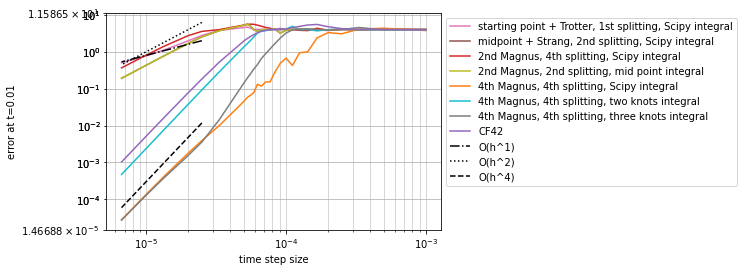

In [39]:
plt.loglog(0.01/vectorofnumberoftimestep, vectoroferror1, label = "starting point + Trotter, 1st splitting, Scipy integral", color = 'tab:pink')
plt.loglog(0.01/vectorofnumberoftimestep, vectoroferror2, label = "midpoint + Strang, 2nd splitting, Scipy integral", color = 'tab:brown')
plt.loglog(0.01/vectorofnumberoftimestep, vectoroferror3, label = "2nd Magnus, 4th splitting, Scipy integral", color = 'tab:red')
plt.loglog(0.01/vectorofnumberoftimestep, vectoroferror4, label = "2nd Magnus, 2nd splitting, mid point integral", color = 'tab:olive')
plt.loglog(0.01/vectorofnumberoftimestep, vectoroferror5, label = "4th Magnus, 4th splitting, Scipy integral", color = 'tab:orange')
plt.loglog(0.01/vectorofnumberoftimestep, vectoroferror6, label = "4th Magnus, 4th splitting, two knots integral", color = 'tab:cyan')
plt.loglog(0.01/vectorofnumberoftimestep, vectoroferror7, label = "4th Magnus, 4th splitting, three knots integral", color = 'tab:gray')
plt.loglog(0.01/vectorofnumberoftimestep, vectoroferror8, label = "CF42", color = 'tab:purple')

plt.loglog(0.01/vectorofnumberoftimestep[[-5,-1]], (0.01/vectorofnumberoftimestep[[-5,-1]])**1*1e4*8, label = "O(h^1)", color = 'black', ls = 'dashdot')
plt.loglog(0.01/vectorofnumberoftimestep[[-5,-1]], (0.01/vectorofnumberoftimestep[[-5,-1]])**2*1e10, label = "O(h^2)", color = 'black', ls = 'dotted')
plt.loglog(0.01/vectorofnumberoftimestep[[-5,-1]], (0.01/vectorofnumberoftimestep[[-5,-1]])**4*1e16*3, label = "O(h^4)", color = 'black', ls = 'dashed')

ax = plt.gca()

# Set the desired number of grid lines for the y-axis
num_major_yticks = 2  # Number of major grid lines
num_minor_yticks = 2  # Number of minor grid lines

# Adjust the y-axis ticks and enable minor ticks
ax.set_yticks(np.logspace(np.log10(ax.get_ylim()[0]), np.log10(ax.get_ylim()[1]), num_major_yticks))
ax.minorticks_on()
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.logspace(0, np.log10(10), num_minor_yticks), numticks=100))

# Show more major grid lines on both axes
ax.grid(which='both', linestyle='-', linewidth='0.5')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('time step size')
plt.ylabel('error at t=0.01')